# Import Library

In [75]:
# Untuk manipulasi data
import pandas as pd
import numpy as np

# Untuk visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns

import os

## Load Data

In [76]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("muhammadbinimran/flight-price-prediction")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/flight-price-prediction


In [77]:
# Path to the Kaggle dataset directory
dataset_path = '/kaggle/input/flight-price-prediction'

# List the files and directories within the dataset path
try:
  dir_contents = os.listdir(dataset_path)
  print(f"Contents of '{dataset_path}':")
  for item in dir_contents:
    print(item)
except FileNotFoundError:
  print(f"Error: The directory '{dataset_path}' was not found.")
except Exception as e:
  print(f"An error occurred: {e}")

Contents of '/kaggle/input/flight-price-prediction':
Data_Train.csv
Test_set.csv


In [78]:
# Memuat dataset training
train_file = os.path.join(dataset_path, 'Data_Train.csv')

# Memuat dataset testing
test_file = os.path.join(dataset_path,'Test_set.csv')

# Exploratory Data Analysis (EDA)

### 📊 Data Understanding

In [79]:
df_train = None
df_test = None

try:
    # Memuat dataset training
    if os.path.exists(train_file):
        df_train = pd.read_csv(train_file)
        print("DataFrame training (df_train) berhasil dimuat.")
        # print(df_train.head()) # Uncomment untuk melihat 5 baris pertama
    else:
        print(f"File training '{train_file}' tidak ditemukan.")
        # Opsi: Coba cari file yang mengandung 'train' jika nama standarnya tidak ada
        # files = [f for f in os.listdir(dataset_path) if 'train' in f.lower() and f.endswith('.csv')]
        # if files:
        #     df_train = pd.read_csv(os.path.join(dataset_path, files[0]))
        #     print(f"DataFrame training (df_train) berhasil dimuat dari '{files[0]}'.")

    # Memuat dataset testing
    if os.path.exists(test_file):
        df_test = pd.read_csv(test_file)
        print("DataFrame testing (df_test) berhasil dimuat.")
        # print(df_test.head()) # Uncomment untuk melihat 5 baris pertama
    else:
        print(f"File testing '{test_file}' tidak ditemukan.")
        # Opsi: Coba cari file yang mengandung 'test' jika nama standarnya tidak ada
        # files = [f for f in os.listdir(dataset_path) if 'test' in f.lower() and f.endswith('.csv')]
        # if files:
        #     df_test = pd.read_csv(os.path.join(dataset_path, files[0]))
        #     print(f"DataFrame testing (df_test) berhasil dimuat dari '{files[0]}'.")

except FileNotFoundError:
    print(f"Error: Direktori '{dataset_path}' tidak ditemukan. Pastikan dataset sudah ter-mount dengan benar.")
except Exception as e:
    print(f"Terjadi kesalahan: {e}")

DataFrame training (df_train) berhasil dimuat.
DataFrame testing (df_test) berhasil dimuat.


In [80]:
# Menampilkan 5 baris pertama dari df_train
print("Lima baris pertama df_train:")
print(df_train.head())

# Menampilkan 5 baris pertama dari df_test (untuk perbandingan struktur)
print("\nLima baris pertama df_test:")
print(df_test.head())

Lima baris pertama df_train:
       Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR ? DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU ? IXR ? BBI ? BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL ? LKO ? BOM ? COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU ? NAG ? BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR ? NAG ? DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897  
1    05:50         13:15   7h 25m     2 stops         No info   7662  
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882  
3    18:05         23:30   5h 25m      1 stop         No info   6218  
4    16:50         21:35   4h 45m      1 stop         No info  13302  

Lima baris pertama df_test:
             Airline Date_of_Journey    S

In [81]:
# Tampilkan info jika dataframe berhasil dimuat
if df_train is not None:
    print("\nInfo df_train:")
    df_train.info()

if df_test is not None:
    print("\nInfo df_test:")
    df_test.info()


Info df_train:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB

Info df_test:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          267

In [82]:
# Statistik deskriptif untuk kolom numerik di df_train
print("\nStatistik Deskriptif Numerik df_train:")
print(df_train.describe())

# Statistik deskriptif untuk kolom kategorikal (tipe object) di df_train
print("\nStatistik Deskriptif Kategorikal df_train:")
print(df_train.describe(include=['object']))


Statistik Deskriptif Numerik df_train:
              Price
count  10683.000000
mean    9087.064121
std     4611.359167
min     1759.000000
25%     5277.000000
50%     8372.000000
75%    12373.000000
max    79512.000000

Statistik Deskriptif Kategorikal df_train:
            Airline Date_of_Journey Source Destination            Route  \
count         10683           10683  10683       10683            10682   
unique           12              44      5           6              128   
top     Jet Airways      18/05/2019  Delhi      Cochin  DEL ? BOM ? COK   
freq           3849             504   4537        4537             2376   

       Dep_Time Arrival_Time Duration Total_Stops Additional_Info  
count     10683        10683    10683       10682           10683  
unique      222         1343      368           5              10  
top       18:55        19:00   2h 50m      1 stop         No info  
freq        233          423      550        5625            8345  


* Untuk kolom numerik, `.describe()` memberikan informasi seperti rata-rata (mean), standar deviasi (std), nilai minimum (min), maksimum (max), dan kuartil. Ini bisa membantu mendeteksi outlier atau memahami sebaran data.
* Untuk kolom objek (kategorikal), `.describe(include=['object'])` memberikan jumlah nilai unik (unique), nilai yang paling sering muncul (top), dan frekuensi nilai tersebut (freq).

In [83]:
print(f"\nDimensi df_train (baris, kolom): {df_train.shape}")
print(f"Dimensi df_test (baris, kolom): {df_test.shape}")


Dimensi df_train (baris, kolom): (10683, 11)
Dimensi df_test (baris, kolom): (2671, 10)


In [84]:
print("\nJumlah missing values per kolom di df_train:")
print(df_train.isnull().sum())

print("\nJumlah missing values per kolom di df_test:")
print(df_test.isnull().sum())


Jumlah missing values per kolom di df_train:
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

Jumlah missing values per kolom di df_test:
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64


* Kita melihat Route dan Total_Stops memiliki 1 nilai hilang di `df_train`. `df_test` tidak memiliki nilai hilang.

In [85]:
print("\nJumlah nilai unik per kolom di df_train:")
print(df_train.nunique())


Jumlah nilai unik per kolom di df_train:
Airline              12
Date_of_Journey      44
Source                5
Destination           6
Route               128
Dep_Time            222
Arrival_Time       1343
Duration            368
Total_Stops           5
Additional_Info      10
Price              1870
dtype: int64


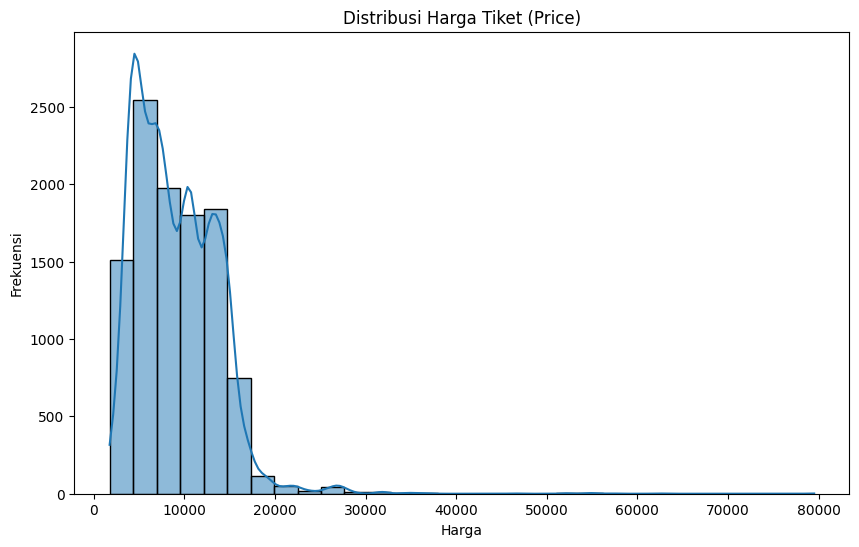


Skewness harga: 1.8125523782189141


In [86]:
plt.figure(figsize=(10, 6))
sns.histplot(df_train['Price'], kde=True, bins=30)
plt.title('Distribusi Harga Tiket (Price)')
plt.xlabel('Harga')
plt.ylabel('Frekuensi')
plt.show()

print(f"\nSkewness harga: {df_train['Price'].skew()}")

* Nilai skewness yang positif menunjukkan bahwa distribusi condong ke kanan (ekor panjang di sisi kanan), yang umum terjadi pada data harga.

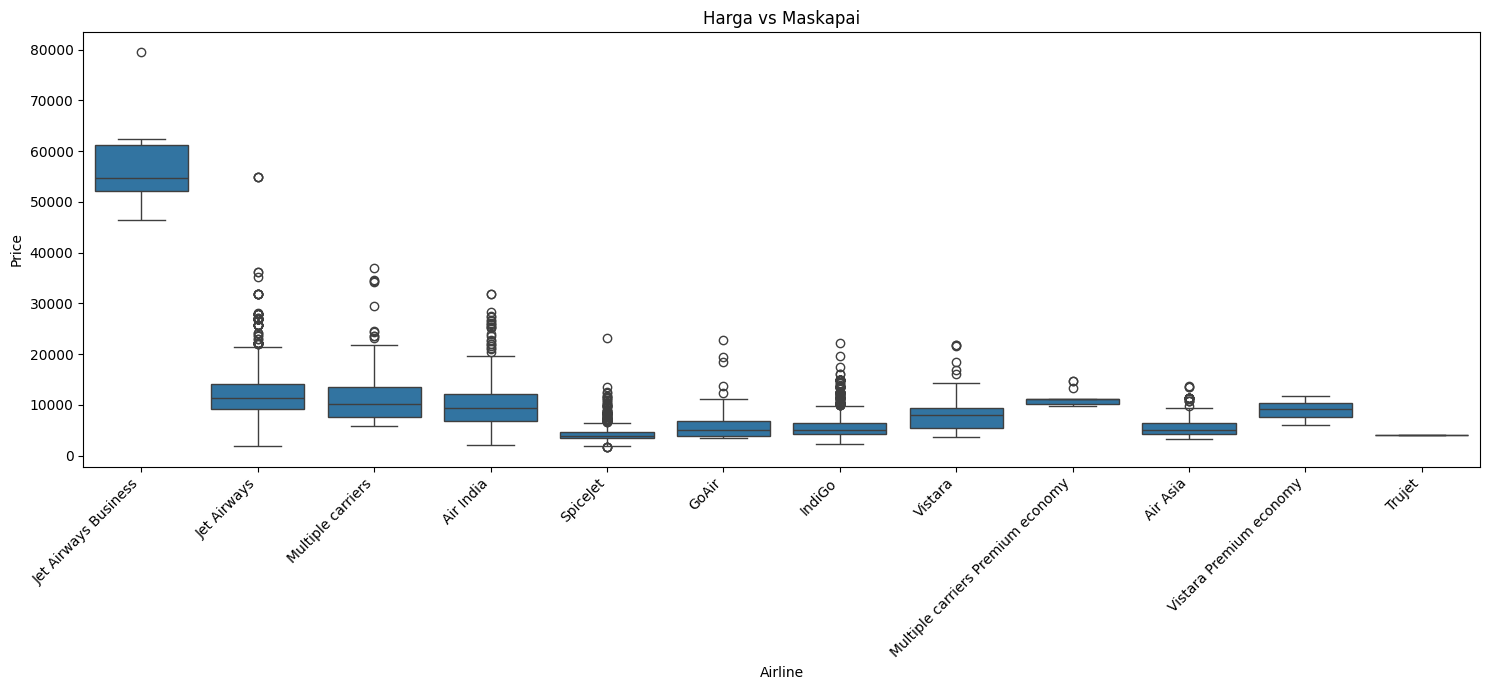

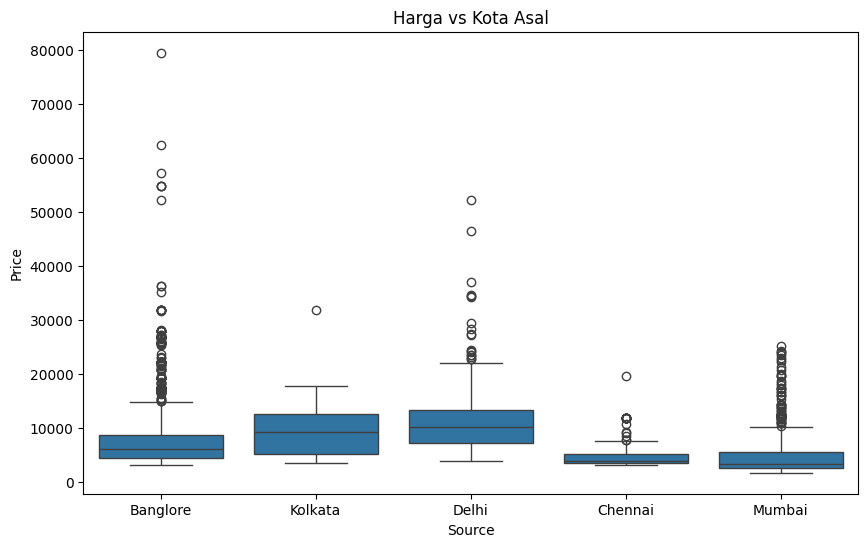

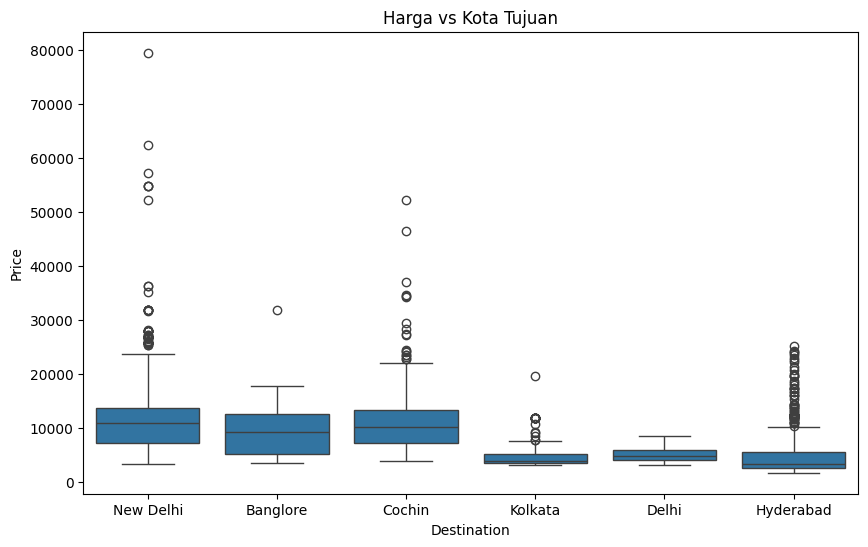

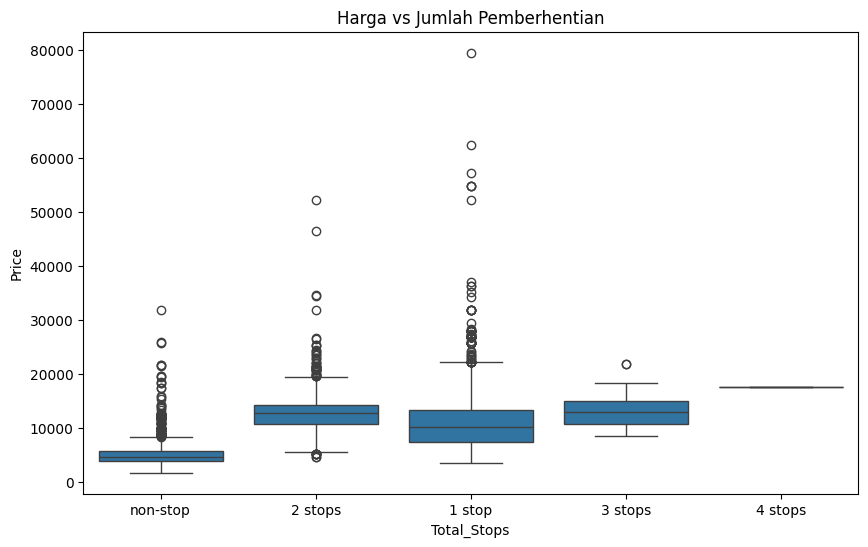

In [87]:
# Airline vs Price
plt.figure(figsize=(15, 7))
sns.boxplot(x='Airline', y='Price', data=df_train.sort_values('Price', ascending=False))
plt.xticks(rotation=45, ha='right')
plt.title('Harga vs Maskapai')
plt.tight_layout()
plt.show()

# Source vs Price
plt.figure(figsize=(10, 6))
sns.boxplot(x='Source', y='Price', data=df_train)
plt.title('Harga vs Kota Asal')
plt.show()

# Destination vs Price
plt.figure(figsize=(10, 6))
sns.boxplot(x='Destination', y='Price', data=df_train)
plt.title('Harga vs Kota Tujuan')
plt.show()

# Total_Stops vs Price
plt.figure(figsize=(10, 6))
sns.boxplot(x='Total_Stops', y='Price', data=df_train)
plt.title('Harga vs Jumlah Pemberhentian')
plt.show()

In [88]:
print("\nContoh nilai di kolom Date_of_Journey:", df_train['Date_of_Journey'].head())
print("Contoh nilai di kolom Dep_Time:", df_train['Dep_Time'].head())
print("Contoh nilai di kolom Arrival_Time:", df_train['Arrival_Time'].head())
print("Contoh nilai di kolom Duration:", df_train['Duration'].head())
print("\nNilai unik di Additional_Info dan frekuensinya:")
print(df_train['Additional_Info'].value_counts())


Contoh nilai di kolom Date_of_Journey: 0    24/03/2019
1     1/05/2019
2     9/06/2019
3    12/05/2019
4    01/03/2019
Name: Date_of_Journey, dtype: object
Contoh nilai di kolom Dep_Time: 0    22:20
1    05:50
2    09:25
3    18:05
4    16:50
Name: Dep_Time, dtype: object
Contoh nilai di kolom Arrival_Time: 0    01:10 22 Mar
1           13:15
2    04:25 10 Jun
3           23:30
4           21:35
Name: Arrival_Time, dtype: object
Contoh nilai di kolom Duration: 0    2h 50m
1    7h 25m
2       19h
3    5h 25m
4    4h 45m
Name: Duration, dtype: object

Nilai unik di Additional_Info dan frekuensinya:
Additional_Info
No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: cou

* Tahap ini menyoroti pentingnya feature engineering yang akan kita lakukan di bagian Data Preparation. Mayoritas Additional_Info adalah "No info", yang mungkin tidak banyak membantu.

### 🛠️ Data Preparation

In [89]:
# Simpan target variable dan hapus dari df_train sebelum menggabungkan
train_price = df_train['Price'].copy()
df_train_features = df_train.drop('Price', axis=1)

# Gabungkan df_train_features dan df_test
# Tambahkan kolom 'dataset_type' untuk mempermudah pemisahan nanti
df_train_features['dataset_type'] = 'train'
df_test['dataset_type'] = 'test'

df_all = pd.concat([df_train_features, df_test], ignore_index=True)

print(f"Dimensi df_all (gabungan): {df_all.shape}")
print(df_all.head())

Dimensi df_all (gabungan): (13354, 11)
       Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR ? DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU ? IXR ? BBI ? BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL ? LKO ? BOM ? COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU ? NAG ? BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR ? NAG ? DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info dataset_type  
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info        train  
1    05:50         13:15   7h 25m     2 stops         No info        train  
2    09:25  04:25 10 Jun      19h     2 stops         No info        train  
3    18:05         23:30   5h 25m      1 stop         No info        train  
4    16:50         21:35   4h 45m      1 stop         No info        train  


* Menggabungkan dataset membantu memastikan bahwa ketika kita melakukan operasi seperti one-hot encoding, semua kategori yang mungkin muncul di kedua set data akan dipertimbangkan, sehingga menghasilkan jumlah fitur yang konsisten.

In [90]:
print("Missing values sebelum penanganan di df_all:")
print(df_all.isnull().sum())

# Karena hanya ada 1 baris dengan missing values di data training asli,
# dan itu adalah bagian dari 'train' set.
# Kita bisa memilih untuk menghapus baris tersebut dari df_all
# jika missing values tersebut berasal dari bagian training.
# Atau, jika ada strategi imputasi yang lebih baik, kita bisa terapkan.
# Untuk kasus ini, menghapus baris dari set training aslinya adalah opsi yang valid.
# Mari kita periksa dulu apakah missing value itu ada di `df_all`
# (seharusnya ada jika baris itu tidak sengaja terhapus sebelumnya)

# Jika missing values hanya ada di bagian train (sebelumnya) dan jumlahnya sedikit
if 'Route' in df_all.columns and df_all['Route'].isnull().sum() > 0:
    print(f"\nBaris dengan NaN di Route (sebelum di-drop dari df_all jika hanya di train):")
    print(df_all[df_all['Route'].isnull()])
    # Menghapus baris dengan NaN. Ini lebih aman dilakukan pada df_train asli sebelum penggabungan.
    # Karena kita sudah menggabungkan, kita perlu hati-hati.
    # Cara yang lebih bersih adalah menangani NaN di df_train SEBELUM penggabungan.

    # Mari kita kembali ke df_train dan df_test asli untuk menangani NaN di df_train
    # kemudian gabungkan lagi. Ini lebih bersih.

# Langkah koreksi: Lakukan dropna pada df_train sebelum menggabungkan
df_train.dropna(inplace=True)
# Reset index setelah dropna jika diperlukan (tidak terlalu krusial di sini karena akan digabungkan)
df_train.reset_index(drop=True, inplace=True)

# Simpan ulang target variable dan gabungkan lagi
train_price = df_train['Price'].copy()
df_train_features = df_train.drop('Price', axis=1)
df_train_features['dataset_type'] = 'train'
# df_test sudah bersih dari NaN
# df_test['dataset_type'] = 'test' # sudah di set sebelumnya

df_all = pd.concat([df_train_features, df_test.copy()], ignore_index=True) # Gunakan .copy() untuk df_test

print("\nMissing values di df_all SETELAH koreksi dan penggabungan ulang:")
print(df_all.isnull().sum())
print(f"Dimensi df_train setelah dropna: {df_train.shape}")
print(f"Dimensi df_all (gabungan) setelah koreksi: {df_all.shape}")

Missing values sebelum penanganan di df_all:
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
dataset_type       0
dtype: int64

Baris dengan NaN di Route (sebelum di-drop dari df_all jika hanya di train):
        Airline Date_of_Journey Source Destination Route Dep_Time  \
9039  Air India       6/05/2019  Delhi      Cochin   NaN    09:45   

      Arrival_Time Duration Total_Stops Additional_Info dataset_type  
9039  09:25 07 May  23h 40m         NaN         No info        train  

Missing values di df_all SETELAH koreksi dan penggabungan ulang:
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dataset_type       0
dtype: int64
Dimensi df_train setelah dropna: (10682, 1

### Feature Engineering

In [91]:
df_all['Date_of_Journey'] = pd.to_datetime(df_all['Date_of_Journey'], format='%d/%m/%Y')
df_all['Journey_Day'] = df_all['Date_of_Journey'].dt.day
df_all['Journey_Month'] = df_all['Date_of_Journey'].dt.month
# df_all['Journey_Year'] = df_all['Date_of_Journey'].dt.year # Biasanya tahun sama untuk dataset semacam ini
# df_all['Day_of_Week'] = df_all['Date_of_Journey'].dt.dayofweek # Senin=0, Minggu=6

# Hapus kolom asli Date_of_Journey
df_all.drop('Date_of_Journey', axis=1, inplace=True)

print("\nSetelah rekayasa fitur Date_of_Journey:")
print(df_all[['Journey_Day', 'Journey_Month']].head())


Setelah rekayasa fitur Date_of_Journey:
   Journey_Day  Journey_Month
0           24              3
1            1              5
2            9              6
3           12              5
4            1              3


In [92]:
df_all['Dep_Hour'] = pd.to_datetime(df_all['Dep_Time']).dt.hour
df_all['Dep_Min'] = pd.to_datetime(df_all['Dep_Time']).dt.minute

# Hapus kolom asli Dep_Time
df_all.drop('Dep_Time', axis=1, inplace=True)

print("\nSetelah rekayasa fitur Dep_Time:")
print(df_all[['Dep_Hour', 'Dep_Min']].head())


Setelah rekayasa fitur Dep_Time:
   Dep_Hour  Dep_Min
0        22       20
1         5       50
2         9       25
3        18        5
4        16       50


In [93]:
df_all['Arrival_Hour'] = pd.to_datetime(df_all['Arrival_Time']).dt.hour
df_all['Arrival_Min'] = pd.to_datetime(df_all['Arrival_Time']).dt.minute

# Hapus kolom asli Arrival_Time
df_all.drop('Arrival_Time', axis=1, inplace=True)

print("\nSetelah rekayasa fitur Arrival_Time:")
print(df_all[['Arrival_Hour', 'Arrival_Min']].head())


Setelah rekayasa fitur Arrival_Time:
   Arrival_Hour  Arrival_Min
0             1           10
1            13           15
2             4           25
3            23           30
4            21           35


In [94]:
def convert_duration_to_minutes(duration):
    if isinstance(duration, str):
        hours = 0
        minutes = 0
        if 'h' in duration:
            hours = int(duration.split('h')[0])
            if 'm' in duration.split('h')[1]:
                minutes = int(duration.split('h')[1].replace('m', '').strip())
        elif 'm' in duration:
            minutes = int(duration.replace('m', ''))
        return hours * 60 + minutes
    return 0 # atau np.nan jika ingin diimputasi nanti

df_all['Duration_Total_Minutes'] = df_all['Duration'].apply(convert_duration_to_minutes)

# Hapus kolom asli Duration
df_all.drop('Duration', axis=1, inplace=True)

print("\nSetelah rekayasa fitur Duration:")
print(df_all[['Duration_Total_Minutes']].head())


Setelah rekayasa fitur Duration:
   Duration_Total_Minutes
0                     170
1                     445
2                    1140
3                     325
4                     285


In [95]:
stop_mapping = {'non-stop': 0, '1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4}
df_all['Total_Stops'] = df_all['Total_Stops'].map(stop_mapping)

# Cek apakah ada NaN yang muncul karena mapping (jika ada nilai yang tidak ada di map)
print("\nNaN di Total_Stops setelah mapping:", df_all['Total_Stops'].isnull().sum())
# Jika ada NaN, periksa nilai unik asli untuk melihat apa yang terlewat
# print(df_all['Total_Stops'].unique()) # Jalankan ini jika ada NaN

print("\nSetelah rekayasa fitur Total_Stops:")
print(df_all['Total_Stops'].value_counts())


NaN di Total_Stops setelah mapping: 0

Setelah rekayasa fitur Total_Stops:
Total_Stops
1    7056
0    4340
2    1899
3      56
4       2
Name: count, dtype: int64


In [96]:
df_all.drop('Route', axis=1, inplace=True)
print("\nKolom Route telah dihapus.")


Kolom Route telah dihapus.


* Kolom Route memiliki banyak informasi yang mungkin sudah tercakup oleh Source, Destination, dan Total_Stops, serta memiliki kardinalitas tinggi. Kita akan menghapusnya.

In [97]:
print("\nFrekuensi nilai di Additional_Info:")
print(df_all['Additional_Info'].value_counts(normalize=True) * 100)

# Karena >78% adalah 'No info', kita bisa membuat fitur yang lebih sederhana
# atau one-hot encode beberapa yang penting.
# Untuk saat ini, mari kita one-hot encode saja dan biarkan model yang menentukan pentingnya.
# Alternatif:
# df_all['Additional_Info_Simplified'] = df_all['Additional_Info'].apply(lambda x: 'No info' if x == 'No info' else 'Other info')

# Kita akan tangani ini bersama dengan fitur kategorikal lainnya menggunakan get_dummies.
# Keputusan: Biarkan get_dummies menangani ini.


Frekuensi nilai di Additional_Info:
Additional_Info
No info                         78.574103
In-flight meal not included     18.168202
No check-in baggage included     2.965626
1 Long layover                   0.149779
Change airports                  0.059912
Business class                   0.037445
No Info                          0.022467
1 Short layover                  0.007489
Red-eye flight                   0.007489
2 Long layover                   0.007489
Name: proportion, dtype: float64


* Sebagian besar nilainya adalah "No info". Kita bisa membuat fitur biner "Has_Additional_Info" atau melakukan one-hot encoding pada beberapa kategori yang paling umum jika ada yang signifikan selain "No info".

In [98]:
categorical_cols = ['Airline', 'Source', 'Destination', 'Additional_Info']

df_all_encoded = pd.get_dummies(df_all, columns=categorical_cols, drop_first=True)

print(f"\nDimensi df_all_encoded setelah one-hot encoding: {df_all_encoded.shape}")
print(df_all_encoded.head())


Dimensi df_all_encoded setelah one-hot encoding: (13353, 38)
   Total_Stops dataset_type  Journey_Day  Journey_Month  Dep_Hour  Dep_Min  \
0            0        train           24              3        22       20   
1            2        train            1              5         5       50   
2            2        train            9              6         9       25   
3            1        train           12              5        18        5   
4            1        train            1              3        16       50   

   Arrival_Hour  Arrival_Min  Duration_Total_Minutes  Airline_Air India  ...  \
0             1           10                     170              False  ...   
1            13           15                     445               True  ...   
2             4           25                    1140              False  ...   
3            23           30                     325              False  ...   
4            21           35                     285              Fal

* `pd.get_dummies()` membuat kolom biner baru untuk setiap kategori dalam fitur kategorikal. `drop_first=True` digunakan untuk menghindari multikolinearitas dengan menghapus salah satu kategori sebagai referensi.

In [99]:
# Memisahkan kembali df_train_processed dan df_test_processed
df_train_processed = df_all_encoded[df_all_encoded['dataset_type'] == 'train'].copy()
df_test_processed = df_all_encoded[df_all_encoded['dataset_type'] == 'test'].copy()

# Hapus kolom 'dataset_type'
df_train_processed.drop('dataset_type', axis=1, inplace=True)
df_test_processed.drop('dataset_type', axis=1, inplace=True)

# Tambahkan kembali kolom 'Price' ke df_train_processed
# Pastikan panjangnya sesuai (karena kita dropna di awal pada df_train asli)
if len(df_train_processed) == len(train_price):
    df_train_processed['Price'] = train_price.values # Gunakan .values untuk menghindari masalah index
else:
    # Ini seharusnya tidak terjadi jika penanganan NaN dan penggabungan dilakukan dengan benar
    # Jika terjadi, perlu investigasi index.
    # Karena kita melakukan reset_index pada df_train setelah dropna, dan train_price diambil dari sana,
    # Seharusnya panjangnya cocok.
    print("PERINGATAN: Panjang df_train_processed dan train_price tidak cocok!")
    # Salah satu cara mengatasi jika index tidak sinkron:
    # df_train_processed = df_train_processed.reset_index(drop=True)
    # train_price = train_price.reset_index(drop=True)
    # df_train_processed['Price'] = train_price
    # Namun, idealnya panjangnya sudah sama.

# Cek ulang panjang setelah penyesuaian karena dropna di df_train awal
if len(df_train_processed) != len(df_train): # df_train yang sudah di-dropna
     print(f"Panjang df_train_processed ({len(df_train_processed)}) tidak sama dengan df_train awal yg di-dropna ({len(df_train)})")
     # Jika ini terjadi, kemungkinan karena train_price diambil sebelum df_train di-dropna secara inplace
     # Solusi: ambil train_price dari df_train yang sudah di-dropna.
     # Ini sudah dilakukan dengan benar di awal bagian Data Preparation.

# Pastikan Price ditambahkan dengan benar
if 'Price' not in df_train_processed.columns and len(df_train_processed) == len(train_price):
    df_train_processed['Price'] = train_price.values


print(f"\nDimensi df_train_processed: {df_train_processed.shape}")
print(df_train_processed.head())
print(f"\nDimensi df_test_processed: {df_test_processed.shape}")
print(df_test_processed.head())

print("\nMissing values di df_train_processed:")
print(df_train_processed.isnull().sum().sum()) # Jumlah total missing values
print("Missing values di df_test_processed:")
print(df_test_processed.isnull().sum().sum())   # Jumlah total missing values


Dimensi df_train_processed: (10682, 38)
   Total_Stops  Journey_Day  Journey_Month  Dep_Hour  Dep_Min  Arrival_Hour  \
0            0           24              3        22       20             1   
1            2            1              5         5       50            13   
2            2            9              6         9       25             4   
3            1           12              5        18        5            23   
4            1            1              3        16       50            21   

   Arrival_Min  Duration_Total_Minutes  Airline_Air India  Airline_GoAir  ...  \
0           10                     170              False          False  ...   
1           15                     445               True          False  ...   
2           25                    1140              False          False  ...   
3           30                     325              False          False  ...   
4           35                     285              False          False  ...  

## Splitting Data

In [100]:
X_train = df_train_processed.drop('Price', axis=1)
y_train = df_train_processed['Price']

X_test = df_test_processed.copy() # Ini adalah data fitur untuk prediksi akhir

print("\nDimensi X_train:", X_train.shape)
print("Dimensi y_train:", y_train.shape)
print("Dimensi X_test:", X_test.shape)

# Pastikan semua kolom di X_train dan X_test adalah numerik
print("\nTipe data X_train setelah persiapan:")
print(X_train.info())
print("\nTipe data X_test setelah persiapan:")
print(X_test.info())


Dimensi X_train: (10682, 37)
Dimensi y_train: (10682,)
Dimensi X_test: (2671, 37)

Tipe data X_train setelah persiapan:
<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10681
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype
---  ------                                        --------------  -----
 0   Total_Stops                                   10682 non-null  int64
 1   Journey_Day                                   10682 non-null  int32
 2   Journey_Month                                 10682 non-null  int32
 3   Dep_Hour                                      10682 non-null  int32
 4   Dep_Min                                       10682 non-null  int32
 5   Arrival_Hour                                  10682 non-null  int32
 6   Arrival_Min                                   10682 non-null  int32
 7   Duration_Total_Minutes                        10682 non-null  int64
 8   Airline_Air India                       

# Modeling

In [101]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler

# Model Regresi
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
# import xgboost as xgb # Jika ingin menggunakan XGBoost, pastikan sudah terinstall

# Metrik Evaluasi
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Untuk mengabaikan peringatan yang mungkin muncul
import warnings
warnings.filterwarnings('ignore')

In [102]:
# Kita sudah memiliki X_train dan y_train dari tahap Data Preparation
# X_train_full = X_train.copy() # Jika ingin menyimpan X_train original
# y_train_full = y_train.copy()

X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

print("Dimensi X_train_split:", X_train_split.shape)
print("Dimensi X_val:", X_val.shape)
print("Dimensi y_train_split:", y_train_split.shape)
print("Dimensi y_val:", y_val.shape)

Dimensi X_train_split: (8545, 37)
Dimensi X_val: (2137, 37)
Dimensi y_train_split: (8545,)
Dimensi y_val: (2137,)


* Meskipun kita memiliki X_test untuk prediksi akhir, kita perlu memisahkan sebagian dari X_train menjadi training set baru dan validation set. Validation set ini digunakan untuk mengevaluasi dan membandingkan model selama proses pengembangan tanpa "menyentuh" X_test (yang hanya boleh digunakan sekali untuk evaluasi final).

In [103]:
# Siapkan dictionary untuk menyimpan hasil metrik
results = {}

def evaluate_model(name, model, X_train_data, y_train_data, X_val_data, y_val_data):
    model.fit(X_train_data, y_train_data)
    y_pred_val = model.predict(X_val_data)

    mae = mean_absolute_error(y_val_data, y_pred_val)
    mse = mean_squared_error(y_val_data, y_pred_val)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_val_data, y_pred_val)

    print(f"--- {name} ---")
    print(f"MAE: {mae:.2f}")
    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R2 Score: {r2:.4f}\n")
    return {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2}

# Model yang akan dicoba (beberapa dengan data yang di-scale, beberapa tidak)
# Karena tree-based models tidak memerlukan scaling, kita bisa gunakan X_train_split langsung.
# Untuk model linear, kita gunakan X_train_scaled.

# 1. Linear Regression (dengan data scaled)
# lr = LinearRegression()
# results['Linear Regression'] = evaluate_model('Linear Regression', lr, X_train_scaled, y_train_split, X_val_scaled, y_val)

# 2. Ridge Regression (dengan data scaled)
# ridge = Ridge(alpha=1.0) # alpha adalah parameter regularisasi
# results['Ridge Regression'] = evaluate_model('Ridge Regression', ridge, X_train_scaled, y_train_split, X_val_scaled, y_val)

# 3. Lasso Regression (dengan data scaled)
# lasso = Lasso(alpha=0.1) # alpha adalah parameter regularisasi
# results['Lasso Regression'] = evaluate_model('Lasso Regression', lasso, X_train_scaled, y_train_split, X_val_scaled, y_val)

# 4. Decision Tree Regressor (dengan data asli, tidak di-scale)
dt = DecisionTreeRegressor(random_state=42)
results['Decision Tree'] = evaluate_model('Decision Tree', dt, X_train_split, y_train_split, X_val, y_val)

# 5. Random Forest Regressor (dengan data asli, tidak di-scale)
rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1) # n_jobs=-1 menggunakan semua core CPU
results['Random Forest (Initial)'] = evaluate_model('Random Forest (Initial)', rf, X_train_split, y_train_split, X_val, y_val)

# 6. Gradient Boosting Regressor (dengan data asli, tidak di-scale)
gbr = GradientBoostingRegressor(n_estimators=100, random_state=42)
results['Gradient Boosting (Initial)'] = evaluate_model('Gradient Boosting (Initial)', gbr, X_train_split, y_train_split, X_val, y_val)

# 7. XGBoost Regressor (dengan data asli, tidak di-scale)
# Pastikan XGBoost sudah diimpor: import xgboost as xgb
# xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42, n_jobs=-1)
# results['XGBoost (Initial)'] = evaluate_model('XGBoost (Initial)', xgb_model, X_train_split, y_train_split, X_val, y_val)

# Tampilkan hasil dalam bentuk tabel
results_df = pd.DataFrame(results).T.sort_values(by='R2', ascending=False)
print("\n--- Perbandingan Performa Model Awal (diurutkan berdasarkan R2 Score) ---")
print(results_df)

--- Decision Tree ---
MAE: 651.46
MSE: 2383323.46
RMSE: 1543.80
R2 Score: 0.8895

--- Random Forest (Initial) ---
MAE: 624.88
MSE: 2127512.55
RMSE: 1458.60
R2 Score: 0.9013

--- Gradient Boosting (Initial) ---
MAE: 1223.95
MSE: 3349549.76
RMSE: 1830.18
R2 Score: 0.8447


--- Perbandingan Performa Model Awal (diurutkan berdasarkan R2 Score) ---
                                     MAE           MSE         RMSE        R2
Random Forest (Initial)       624.880522  2.127513e+06  1458.599517  0.901331
Decision Tree                 651.463890  2.383323e+06  1543.801626  0.889467
Gradient Boosting (Initial)  1223.947246  3.349550e+06  1830.177522  0.844655


* Fungsi evaluate_model membantu kita melatih dan mengevaluasi setiap model dengan cara yang konsisten. Kita menggunakan R2 Score sebagai metrik utama untuk perbandingan awal, tetapi MAE dan RMSE juga penting untuk memahami besaran error dalam satuan harga. n_estimators pada model ensemble seperti Random Forest menentukan jumlah pohon.

* Melihat hasil perbandingan model, maka digunakan Random Forest untuk tuning lebih lanjut

### Hyperparameter Tuning Random Forest

In [104]:
# Parameter grid untuk Random Forest
param_dist_rf = {
    'n_estimators': [100, 200, 300], # Jumlah pohon
    'max_depth': [None, 10, 20, 30],    # Kedalaman maksimum pohon
    'min_samples_split': [2, 5, 10],   # Jumlah minimum sampel untuk membagi node
    'min_samples_leaf': [1, 2, 4],     # Jumlah minimum sampel pada leaf node
    'max_features': ['sqrt', 'log2', None] # Jumlah fitur yang dipertimbangkan saat mencari split terbaik
}

rf_tuned = RandomForestRegressor(random_state=42, n_jobs=-1)

# RandomizedSearchCV
# n_iter: jumlah kombinasi parameter yang dicoba
# cv: jumlah fold untuk cross-validation
random_search_rf = RandomizedSearchCV(estimator=rf_tuned,
                                   param_distributions=param_dist_rf,
                                   n_iter=20, # Coba 20 kombinasi acak
                                   cv=3,      # 3-fold cross-validation
                                   verbose=1, # Tampilkan progress
                                   random_state=42,
                                   scoring='r2') # Metrik untuk evaluasi

# Lakukan pencarian pada data training (X_train_split, y_train_split)
# Ingat: Random Forest tidak memerlukan data yang di-scale
random_search_rf.fit(X_train_split, y_train_split)

print(f"\nParameter terbaik untuk Random Forest: {random_search_rf.best_params_}")
print(f"Skor R2 terbaik dari cross-validation: {random_search_rf.best_score_:.4f}")

# Dapatkan model terbaik
best_rf_model = random_search_rf.best_estimator_

# Evaluasi model terbaik hasil tuning pada validation set
results['Random Forest (Tuned)'] = evaluate_model('Random Forest (Tuned)', best_rf_model, X_train_split, y_train_split, X_val, y_val)

# Update dan tampilkan kembali tabel hasil
results_df = pd.DataFrame(results).T.sort_values(by='R2', ascending=False)
print("\n--- Perbandingan Performa Model Setelah Tuning Random Forest ---")
print(results_df)

Fitting 3 folds for each of 20 candidates, totalling 60 fits

Parameter terbaik untuk Random Forest: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 30}
Skor R2 terbaik dari cross-validation: 0.8524
--- Random Forest (Tuned) ---
MAE: 633.96
MSE: 2071080.50
RMSE: 1439.12
R2 Score: 0.9039


--- Perbandingan Performa Model Setelah Tuning Random Forest ---
                                     MAE           MSE         RMSE        R2
Random Forest (Tuned)         633.961197  2.071080e+06  1439.124907  0.903948
Random Forest (Initial)       624.880522  2.127513e+06  1458.599517  0.901331
Decision Tree                 651.463890  2.383323e+06  1543.801626  0.889467
Gradient Boosting (Initial)  1223.947246  3.349550e+06  1830.177522  0.844655


* Hyperparameter tuning adalah proses mencari kombinasi parameter optimal untuk sebuah model. RandomizedSearchCV mencoba sejumlah kombinasi parameter secara acak dari distribusi yang kita tentukan (param_dist_rf) dan menggunakan cross-validation untuk mengevaluasi setiap kombinasi.

In [105]:
# Misalkan model terbaik adalah best_rf_model (Random Forest yang sudah di-tune)
final_model = best_rf_model # Atau model lain yang terpilih

# Jika model terbaik memerlukan data yang di-scale (misal Linear Regression, Ridge, Lasso):
# scaler_final = StandardScaler()
# X_train_final_scaled = scaler_final.fit_transform(X_train) # Fit pada KESELURUHAN X_train
# final_model.fit(X_train_final_scaled, y_train)

# Jika model terbaik tidak memerlukan scaling (misal Random Forest, XGBoost):
final_model.fit(X_train, y_train)

print("\nModel final telah dilatih pada keseluruhan data X_train.")


Model final telah dilatih pada keseluruhan data X_train.


# Final Model yang digunakan adalah Random Forest (Tuned)

# 🏅 Evaluation

In [106]:
# Misalkan final_model adalah best_rf_model yang sudah dilatih pada keseluruhan X_train
# Jika belum, latih kembali di sini (seperti di akhir tahap Modeling)
# final_model.fit(X_train, y_train) # Pastikan ini sudah dijalankan

# Untuk evaluasi, kita gunakan X_val dan y_val yang sudah ada.
# Jika model memerlukan scaling, X_val harus di-scale dengan scaler yang di-fit pada X_train_split.
# Jika final_model dilatih pada X_train (bukan X_train_split) dan menggunakan scaling,
# maka X_val juga harus di-transform menggunakan scaler yang di-fit pada X_train penuh.

# Mari kita asumsikan `final_model` adalah model tree-based (seperti Random Forest)
# yang dilatih pada data X_train (tidak di-scale) dan y_train.
# Maka, kita evaluasi pada X_val (tidak di-scale) dan y_val.

# Jika Anda melatih final_model pada X_train_scaled (misalnya untuk model linear),
# maka X_val juga harus di-scale dengan scaler yang sama (yang di-fit pada X_train).
# scaler_final = StandardScaler().fit(X_train) # Fit pada X_train penuh
# X_val_for_final_eval_scaled = scaler_final.transform(X_val)
# y_pred_final_val = final_model.predict(X_val_for_final_eval_scaled)


# Asumsi kita menggunakan model tree-based (misal, Random Forest Tuned)
# yang tidak memerlukan scaling dan sudah dilatih pada X_train penuh.
# Kita akan mengevaluasinya pada X_val dan y_val (yang tidak di-scale).
y_pred_val_final = final_model.predict(X_val) # X_val dari train_test_split(X_train, y_train)

final_mae = mean_absolute_error(y_val, y_pred_val_final)
final_mse = mean_squared_error(y_val, y_pred_val_final)
final_rmse = np.sqrt(final_mse)
final_r2 = r2_score(y_val, y_pred_val_final)

print("--- Performa Final Model pada Validation Set ---")
print(f"Model: {type(final_model).__name__}")
# Jika Anda menyimpan parameter terbaik, tampilkan di sini
if hasattr(final_model, 'get_params'):
    print(f"Parameter: {final_model.get_params()}") # Ini akan menampilkan semua parameter

print(f"\nMAE: {final_mae:.2f}")
print(f"MSE: {final_mse:.2f}")
print(f"RMSE: {final_rmse:.2f}")
print(f"R2 Score: {final_r2:.4f}\n")

# Simpan hasil ini untuk laporan
evaluation_summary = {
    'Model': type(final_model).__name__,
    'MAE_Validation': final_mae,
    'MSE_Validation': final_mse,
    'RMSE_Validation': final_rmse,
    'R2_Validation': final_r2
}

--- Performa Final Model pada Validation Set ---
Model: RandomForestRegressor
Parameter: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 30, 'max_features': None, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 300, 'n_jobs': -1, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}

MAE: 333.52
MSE: 610381.69
RMSE: 781.27
R2 Score: 0.9717



* Kode di atas menghitung kembali metrik pada validation set menggunakan final_model. Ini penting untuk dilaporkan sebagai indikasi seberapa baik model kita diharapkan berkinerja pada data baru.

In [107]:
# Pastikan X_test (dari tahap Data Preparation) memiliki kolom yang sama dan urutan yang sama
# dengan data yang digunakan untuk melatih final_model (yaitu X_train).

# Jika final_model dilatih dengan data yang di-scale:
if 'scaler' in globals() or 'scaler_final' in globals(): # Cek apakah scaler ada
    # Pilih scaler yang tepat:
    # Jika final_model dilatih pada X_train_split_scaled, gunakan scaler yang di-fit pada X_train_split.
    # Jika final_model dilatih pada X_train_full_scaled, gunakan scaler yang di-fit pada X_train_full.
    # Kita akan asumsikan kita punya scaler_final yang di-fit pada X_train penuh.
    if 'scaler_final' not in globals(): # Jika belum ada, buat dan fit pada X_train penuh
        print("Membuat dan fitting scaler_final pada X_train...")
        scaler_final = StandardScaler()
        scaler_final.fit(X_train) # Fit pada KESELURUHAN X_train

    print("Melakukan scaling pada X_test...")
    X_test_scaled = scaler_final.transform(X_test)
    predictions_test = final_model.predict(X_test_scaled)
    print("Prediksi pada X_test (menggunakan data scaled) selesai.")
else:
    # Jika final_model adalah model tree-based yang dilatih pada data tidak di-scale
    print("Membuat prediksi pada X_test (tanpa scaling)...")
    predictions_test = final_model.predict(X_test)
    print("Prediksi pada X_test (tanpa scaling) selesai.")


# Tampilkan beberapa prediksi pertama
print("\nContoh 5 prediksi pertama untuk Test Set:")
print(predictions_test[:5])

# Prediksi ini bisa negatif jika model (misalnya Linear Regression) tidak dibatasi.
# Harga tiket tidak mungkin negatif, jadi kita bisa set batas bawah 0 jika perlu.
# Namun, model seperti Random Forest biasanya tidak menghasilkan prediksi negatif jika targetnya positif.
predictions_test_final = np.maximum(0, predictions_test) # Pastikan harga tidak negatif

print("\nContoh 5 prediksi pertama (setelah memastikan non-negatif):")
print(predictions_test_final[:5])

# Simpan prediksi ini jika diperlukan untuk submission
submission_df = pd.DataFrame({'Predicted_Price': predictions_test_final})
print("\nDataFrame Prediksi untuk Test Set:")
print(submission_df.head())

# Jika ada kolom ID di test set asli yang perlu disertakan untuk submission:
# df_test_original = pd.read_csv('Test_set.csv') # Muat ulang jika perlu ID
# submission_df['ID_Column'] = df_test_original['ID_Column_Name'] # Sesuaikan nama kolom ID
# submission_df = submission_df[['ID_Column', 'Predicted_Price']] # Atur urutan

Melakukan scaling pada X_test...
Prediksi pada X_test (menggunakan data scaled) selesai.

Contoh 5 prediksi pertama untuk Test Set:
[ 9909.394329   10138.05970899  6528.1909121   9455.1699917
  9393.88394673]

Contoh 5 prediksi pertama (setelah memastikan non-negatif):
[ 9909.394329   10138.05970899  6528.1909121   9455.1699917
  9393.88394673]

DataFrame Prediksi untuk Test Set:
   Predicted_Price
0      9909.394329
1     10138.059709
2      6528.190912
3      9455.169992
4      9393.883947


* Kode ini menghasilkan prediksi harga untuk dataset Test_set.csv. Karena kita tidak memiliki harga sebenarnya untuk X_test, kita tidak bisa menghitung metrik evaluasi di sini. Prediksi ini adalah output akhir dari model kita untuk data baru.

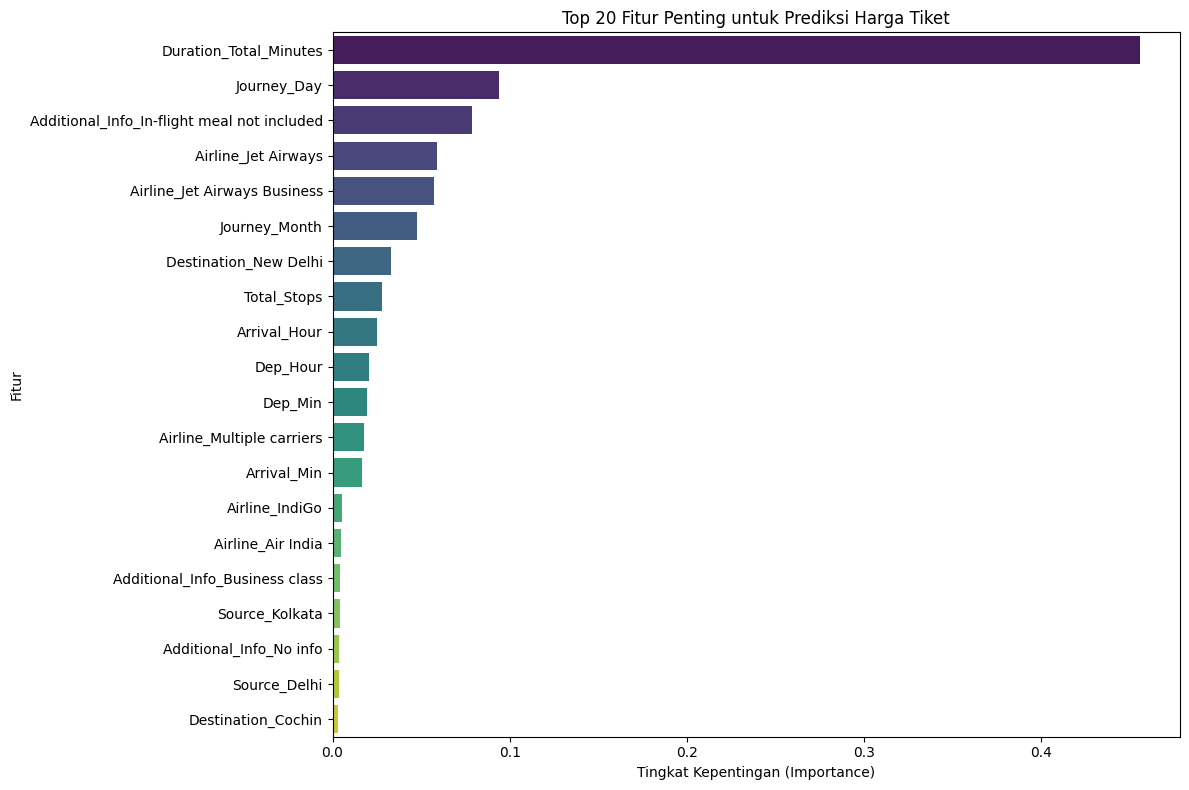


Fitur Penting (Top N):
                                        Feature  Importance
7                        Duration_Total_Minutes    0.455490
1                                   Journey_Day    0.093876
32  Additional_Info_In-flight meal not included    0.078899
11                          Airline_Jet Airways    0.059015
12                 Airline_Jet Airways Business    0.057504
2                                 Journey_Month    0.047932
27                        Destination_New Delhi    0.033003
0                                   Total_Stops    0.027999
5                                  Arrival_Hour    0.024925
3                                      Dep_Hour    0.020446
4                                       Dep_Min    0.019188
13                    Airline_Multiple carriers    0.017836
6                                   Arrival_Min    0.016594
10                               Airline_IndiGo    0.005212
8                             Airline_Air India    0.004743
30              

In [108]:
# Pastikan final_model adalah model yang memiliki atribut feature_importances_
# (misalnya, RandomForestRegressor, GradientBoostingRegressor, XGBRegressor)
# dan sudah dilatih.

if hasattr(final_model, 'feature_importances_'):
    importances = final_model.feature_importances_
    feature_names = X_train.columns # Ambil nama kolom dari X_train (data fitur sebelum scaling)

    # Buat DataFrame untuk visualisasi
    feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

    # Visualisasi N fitur terpenting
    plt.figure(figsize=(12, 8))
    # Ambil top N fitur, misal top 15 atau top 20
    top_n = 20
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(top_n), palette='viridis')
    plt.title(f'Top {top_n} Fitur Penting untuk Prediksi Harga Tiket')
    plt.xlabel('Tingkat Kepentingan (Importance)')
    plt.ylabel('Fitur')
    plt.tight_layout()
    plt.show()

    print("\nFitur Penting (Top N):")
    print(feature_importance_df.head(top_n))
else:
    print(f"Model {type(final_model).__name__} tidak memiliki atribut 'feature_importances_'.")
    print("Feature importance biasanya tersedia untuk model berbasis pohon.")
    # Jika modelnya linear (LinearRegression, Ridge, Lasso), Anda bisa melihat koefisiennya:
    # if hasattr(final_model, 'coef_'):
    #     coefficients = final_model.coef_
    #     coef_df = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': coefficients})
    #     coef_df['Abs_Coefficient'] = np.abs(coef_df['Coefficient'])
    #     coef_df = coef_df.sort_values(by='Abs_Coefficient', ascending=False)
    #     print("\nKoefisien Model Linear (diurutkan berdasarkan nilai absolut):")
    #     print(coef_df)
    #     # Visualisasi koefisien
    #     plt.figure(figsize=(12, 8))
    #     sns.barplot(x='Coefficient', y='Feature', data=coef_df.head(20)) # top 20
    #     plt.title('Koefisien Fitur Model Linear')
    #     plt.show()

* Dapat dilihat bahwa `Duration_Total_Minutes` memilii importance yang tinggi dalam penentuan harga tiket pesawat

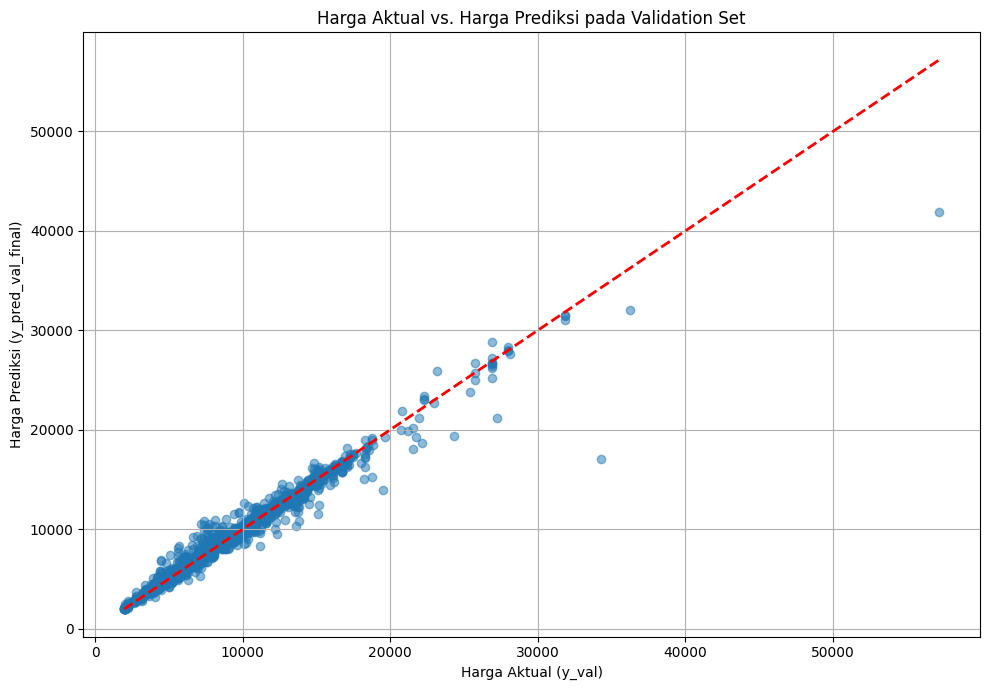

In [109]:
plt.figure(figsize=(10, 7))
plt.scatter(y_val, y_pred_val_final, alpha=0.5)
plt.plot([min(y_val.min(), y_pred_val_final.min()), max(y_val.max(), y_pred_val_final.max())],
         [min(y_val.min(), y_pred_val_final.min()), max(y_val.max(), y_pred_val_final.max())],
         color='red', linestyle='--', lw=2) # Garis diagonal y=x
plt.title('Harga Aktual vs. Harga Prediksi pada Validation Set')
plt.xlabel('Harga Aktual (y_val)')
plt.ylabel('Harga Prediksi (y_pred_val_final)')
plt.grid(True)
plt.tight_layout()
plt.show()

* Hasil scatter plot menunjukkan prediksi cukup baik, dengan sebagian besar titik dekat garis ideal. Outlier terlihat sedikit menyebar.

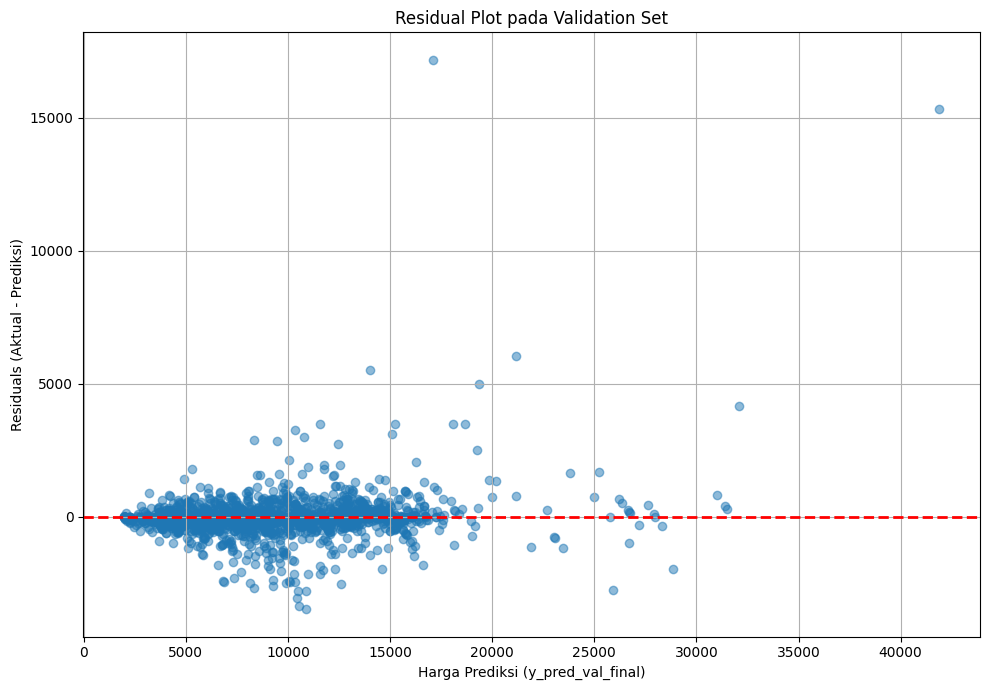

In [110]:
residuals = y_val - y_pred_val_final

plt.figure(figsize=(10, 7))
plt.scatter(y_pred_val_final, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--', lw=2) # Garis horizontal di y=0
plt.title('Residual Plot pada Validation Set')
plt.xlabel('Harga Prediksi (y_pred_val_final)')
plt.ylabel('Residuals (Aktual - Prediksi)')
plt.grid(True)
plt.tight_layout()
plt.show()